<a href="https://colab.research.google.com/github/zangatec/Equipo_Ciencia_de_datos/blob/main/Entrega%201%20reto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maestría en Inteligencia Artificial Aplicada

Curso: Ciencia y Analítica de Datos

Tecnológico de Monterrey

Dra. María de la Paz Rico Fernández

Reto-> Entrega 1 (16/11) -> Limpieza, análisis, visualización y kmeans

Pedro Ulises Meléndez Ortega

00716301

Jose Francisco Miranda Garcia
00837306

Limpieza, análisis, visualización y agrupamiento.
En esta base de datos encontraras:

Aguas subterraneas.
Aguas superficiales.
Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

Limpieza de base de datos.
 Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
Identificar correlaciones.
Preparar los datos 
Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import requests, zipfile 
from io import BytesIO
import geopandas as gpd
from shapely.geometry import Point


In [3]:
#Obtención de la data 

#Opcion 1, carga directa (pero a veces marca time out)

Liga = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(Liga)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
dfraw=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
dfraw

#Opcion 2, carga previa del archivo en colab

#local = "/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
#dfraw = pd.read_csv(local, delimiter=",", encoding="latin1", index_col = 0)
#dfraw.index.name = None
#dfraw

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [4]:
#Exploración de la data
df = dfraw
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [5]:
#Observamos al inicio solo 6 variables numericas, de las cuales, 2 de ellas son de geolocalización, por lo que oslo hay 4 variables numericas en el set de datos original 
#Las demás son variables tipo string u objeto que deberemos que cambiar ya sea por bins, boolean u otra forma
df.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [7]:
df.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [8]:
print('Conteo de nulos en las columnas:')
print(df.isnull().sum(axis = 0))


Conteo de nulos en las columnas:
CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG

In [9]:
#De entrada vamos a descartar la variable SDT_mg/L porque practicamente esta vacía y la variable CONTAMINANTES porque solo se tiene el 60% de los datos.

df=df.drop("CONTAMINANTES", axis = "columns")
df=df.drop("SDT_mg/L", axis = "columns")


In [10]:
#Existen valores qque se catalogan como object (string) debido al caracter "<"por lo que serán sustituidos.
colmenorque= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in colmenorque:
  df[name] = df[name].astype('str')
  df[name] = df[name].str.replace('<25','25') 
  df[name] = df[name].str.replace('<0.2','0.2') 
  df[name] = df[name].str.replace('<20','20') 
  df[name] = df[name].str.replace('<1.1','1.1')
  df[name] = df[name].str.replace('<0.02','0.02') 
  df[name] = df[name].str.replace('<0.01','0.01') 
  df[name] = df[name].str.replace('<0.003','0.003')
  df[name] = df[name].str.replace('<0.005','0.004') 
  df[name] = df[name].str.replace('<0.0005','0.0004') 
  df[name] = df[name].str.replace('<0.0015','0.0015') 
  df[name] = df[name].str.replace('<0.025','0.025')  
  df[name]= df[name].astype('float')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   float64
 15  CALIDAD_SDT_ra       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_

In [11]:
Y=pd.DataFrame(df['SEMAFORO'])


In [12]:
print('Conteo de nulos en las columnas:')
print(df.isnull().sum(axis = 0))

Conteo de nulos en las columnas:
CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                4
CALIDAD_ALC             4
CONDUCT_mS/cm           6
CALIDAD_CONDUC          6
SDT_M_mg/L              2
CALIDAD_SDT_ra          2
CALIDAD_SDT_salin       2
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                1
CALIDAD_DUR             1
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              1
CALIDAD_N_NO3           1
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TO

In [13]:
# Valores faltantes en:"ALC_mg/L", "CALIDAD_ALC", "CONDUCT_mS/cm", "CALIDAD_CONDUC", "SDT_M_mg/L", "CALIDAD_SDT_ra", "CALIDAD_SDT_salin", 
#"DUR_mg/L", "CALIDAD_DUR", "N_NO3_mg/L", "CALIDAD_N_NO3"

# Se observarfon nulos en varias las variables, enfocandonos en las de tipo objeto (string) de calidad estan directamente relacionadas al valor absoluto 
#del valor recolectado por lo que solo se considera necesario transformar a float o int la variable "SUBTIPO", no obstante, esta variable se observa altamente
# desbalanceada:1044 valores son POZO y solo 25 otro tipo de variables. por lo que no se transformará

# A continuación imputamos los valores de las variable numéricas con datos faltantes en el set de datos

columnasval = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in columnasval:
  promedio = df[name].mean() 
  df[name]= df[name].replace(np.nan, promedio)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1068 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1068 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1068 non-null   float64
 15  CALIDAD_SDT_ra       

In [14]:
#Aislamos el Dataframe con las variables numericas que ya no tienen nulos y con las que se trabajará.

df1 = df[['LATITUD','LONGITUD','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L',
                       'AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]
                      
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LATITUD              1068 non-null   float64
 1   LONGITUD             1068 non-null   float64
 2   ALC_mg/L             1068 non-null   float64
 3   CONDUCT_mS/cm        1068 non-null   float64
 4   SDT_M_mg/L           1068 non-null   float64
 5   FLUORUROS_mg/L       1068 non-null   float64
 6   DUR_mg/L             1068 non-null   float64
 7   COLI_FEC_NMP/100_mL  1068 non-null   float64
 8   N_NO3_mg/L           1068 non-null   float64
 9   AS_TOT_mg/L          1068 non-null   float64
 10  CD_TOT_mg/L          1068 non-null   float64
 11  CR_TOT_mg/L          1068 non-null   float64
 12  HG_TOT_mg/L          1068 non-null   float64
 13  PB_TOT_mg/L          1068 non-null   float64
 14  MN_TOT_mg/L          1068 non-null   float64
 15  FE_TOT_mg/L          1068 non-null   f

In [15]:
#Obtenemos tendencias centrales promedio, media y mediana de los datos,  medidas de dispersión, máximo, mínimo
df1.describe()

,LATITUD,LONGITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,23.163618,-101.891007,235.633759,1138.953013,896.101567,1.075600,347.938073,355.490356,4.319759,0.019618,0.003030,0.012476,0.000467,0.004310,0.072478,0.410387
std,3.887670,6.703263,116.655014,1242.056683,2748.950627,1.924278,359.500870,2052.457014,8.341222,0.035209,0.000894,0.154435,0.000479,0.003342,0.376512,5.537974
min,14.561150,-116.664250,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.025000
25%,20.212055,-105.388865,164.048750,505.500000,337.700000,0.267175,121.274100,1.100000,0.650932,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.025000
50%,22.617190,-102.174180,215.825000,822.500000,551.400000,0.503500,245.662350,1.100000,2.082916,0.010000,0.003000,0.004000,0.000400,0.004000,0.001500,0.046960
75%,25.510285,-98.974716,292.423750,1321.250000,915.900000,1.139850,453.930000,13.250000,5.200047,0.010000,0.003000,0.004000,0.000400,0.004000,0.009947,0.173380
max,32.677713,-86.864120,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [16]:
#Realizamos correlación de los datos.
df1.corr()

,LATITUD,LONGITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
LATITUD,1.000000,-0.760204,-0.079797,0.053506,0.059834,0.131382,0.085163,0.063130,0.148230,0.090597,-0.053099,-0.058940,-0.111811,-0.051872,-0.036289,-0.041591
LONGITUD,-0.760204,1.000000,0.166915,0.060803,-0.013926,-0.122633,0.088164,-0.084443,-0.107531,-0.077090,0.043595,0.058910,0.043234,-0.000442,-0.036141,0.021927
ALC_mg/L,-0.079797,0.166915,1.000000,0.219654,0.079285,0.068932,0.242957,-0.016448,-0.000394,0.073289,0.032686,-0.014253,0.069753,0.016930,0.129861,0.043423
CONDUCT_mS/cm,0.053506,0.060803,0.219654,1.000000,0.286406,-0.025177,0.692270,0.017807,0.219331,-0.003682,0.029040,0.004361,0.056967,0.024685,0.095925,0.083177
SDT_M_mg/L,0.059834,-0.013926,0.079285,0.286406,1.000000,-0.013796,0.347115,-0.001133,0.101594,-0.010156,0.010800,-0.000507,0.020300,0.002496,0.018927,0.020104
FLUORUROS_mg/L,0.131382,-0.122633,0.068932,-0.025177,-0.013796,1.000000,-0.149676,0.003564,-0.019780,0.444079,-0.015123,-0.005205,-0.028597,-0.034191,-0.049742,-0.009994
DUR_mg/L,0.085163,0.088164,0.242957,0.692270,0.347115,-0.149676,1.000000,0.031727,0.301410,-0.106494,0.025002,0.007336,0.065410,-0.017330,0.083821,0.059775
COLI_FEC_NMP/100_mL,0.063130,-0.084443,-0.016448,0.017807,-0.001133,0.003564,0.031727,1.000000,-0.000969,0.038151,-0.001656,-0.008938,-0.008903,0.021451,-0.005326,0.003045
N_NO3_mg/L,0.148230,-0.107531,-0.000394,0.219331,0.101594,-0.019780,0.301410,-0.000969,1.000000,-0.008019,-0.009362,-0.015171,0.011332,-0.017341,-0.036854,0.013298
AS_TOT_mg/L,0.090597,-0.077090,0.073289,-0.003682,-0.010156,0.444079,-0.106494,0.038151,-0.008019,1.000000,-0.009078,-0.009698,-0.012593,-0.023608,0.016916,0.014295


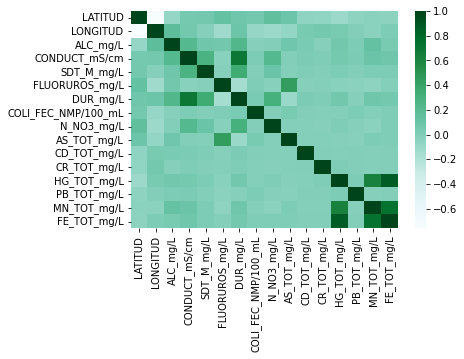

In [17]:
# Obervamos la matriz de correlación, y encontramos relaciones entre las variables HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L', sería interesante graficar junto con 
#semáforo ya normalizados los coilores a numeros
mcorrelacion = df1.corr()
sns.heatmap (mcorrelacion,cmap='BuGn')

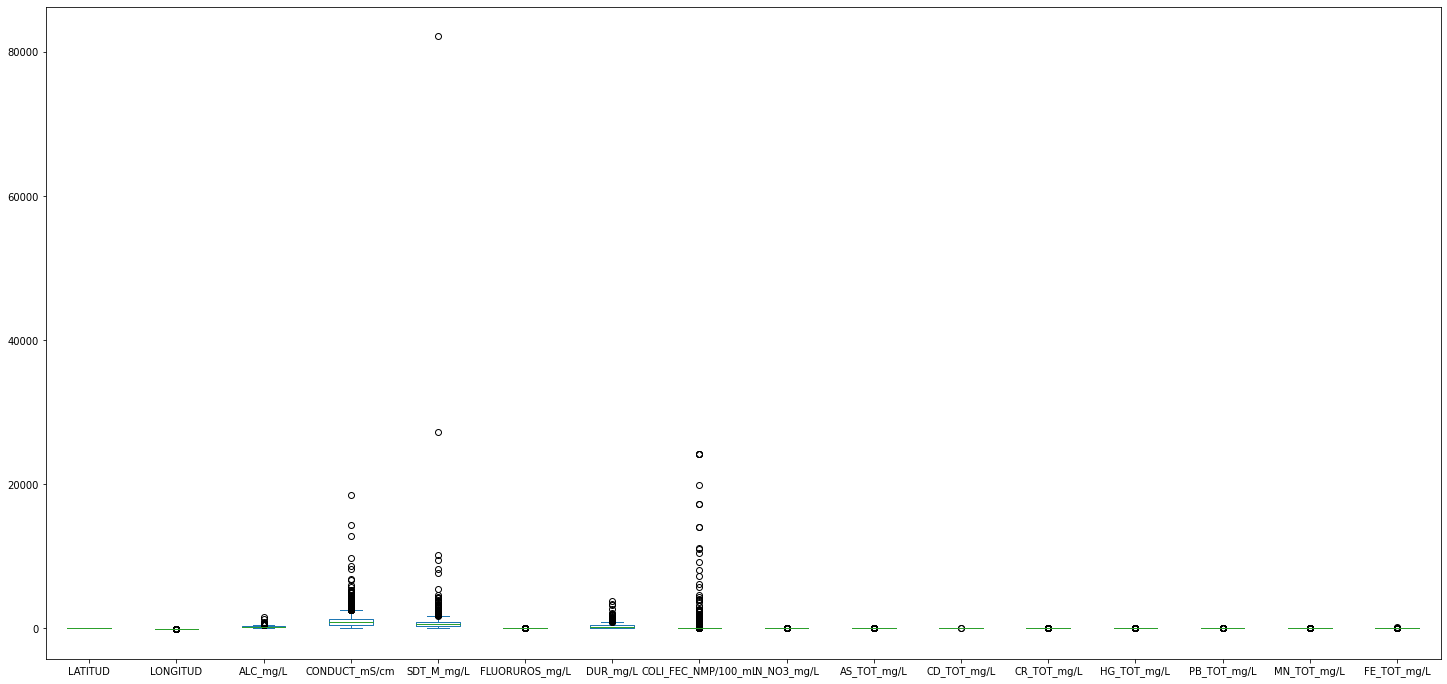

In [18]:
#Identificamos medidas de posición no centrales , los cuartiles , outliers. 
df1.plot.box(figsize = (25,12))

In [19]:
dfpuntos = df1[['LONGITUD','LATITUD']]

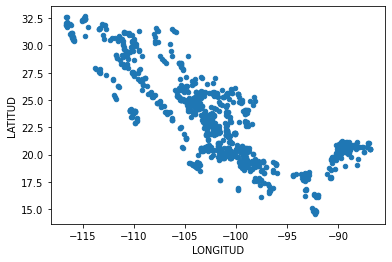

In [20]:
dfpuntos.plot.scatter('LONGITUD','LATITUD')

In [21]:
dfpuntos["Coordinates"] = list(zip(dfpuntos.LONGITUD, dfpuntos.LATITUD))
dfpuntos["Coordinates"] = dfpuntos["Coordinates"].apply(Point)
dfpuntos.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,Coordinates
0,-102.02210,22.20887,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,POINT (-110.24480 23.45138)
...,...,...,...
1063,-99.54191,24.76036,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,POINT (-100.32683 24.80118)


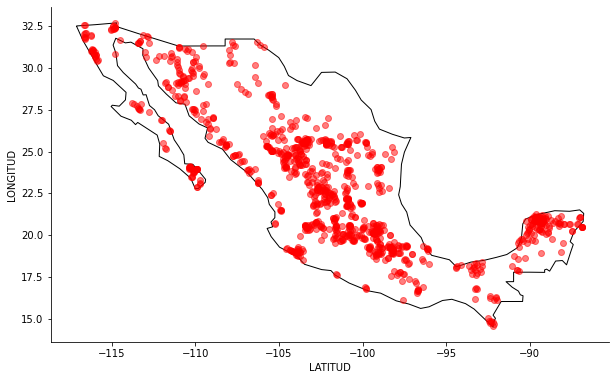

In [22]:
mapa = gpd.GeoDataFrame(dfpuntos, geometry="Coordinates")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# Seleccionamos el mapa de la República Mexicana
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

mapa.plot(ax=gax, color='red', alpha = 0.5)
mapa

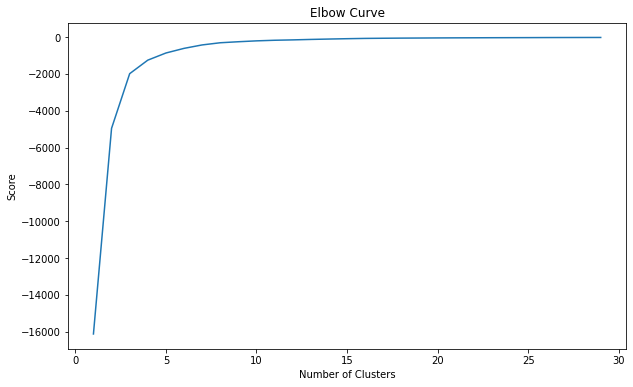

In [23]:
#Obtener la curva de codo para valores del 1 al 30
from sklearn.cluster import KMeans

NC = range(1,30) 
mi_kmeans = [KMeans(n_clusters=i) for i in NC]
Y_axis = dfpuntos[['LATITUD']]
X_axis = dfpuntos[['LONGITUD']]
resultadok = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

plt.figure(figsize=(10,6))
plt.plot(NC, resultadok)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()

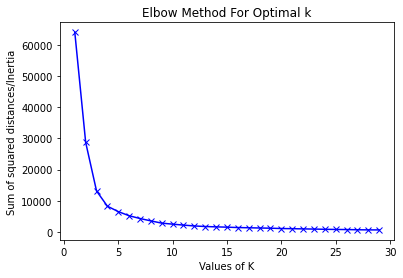

In [24]:
#Conocer la distancia cuadratica de los grupos hacia sus centroides probando del 1 al 30
X1=dfraw[["LATITUD","LONGITUD"]]
Sum_of_squared_distances = []
K = range(1,30)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X1)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [25]:
#En la grafica anterior vemos que el error cuadratico medio va disminuyendo por lo que tomaremos 25 clusters

X = dfraw[['LONGITUD', 'LATITUD']]

#kmeans = KMeans(n_clusters=25).fit(X) 
kmeans = KMeans(n_clusters=25).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
centroides

,0,1,Coordinates
0,-115.780432,31.622931,POINT (-115.78043 31.62293)
1,-99.436303,20.096215,POINT (-99.43630 20.09621)
2,-104.780944,24.819636,POINT (-104.78094 24.81964)
3,-89.627607,20.535159,POINT (-89.62761 20.53516)
4,-109.722087,27.266892,POINT (-109.72209 27.26689)
5,-101.204748,20.151878,POINT (-101.20475 20.15188)
6,-93.018481,17.887457,POINT (-93.01848 17.88746)
7,-112.903746,31.309819,POINT (-112.90375 31.30982)
8,-101.006452,25.044696,POINT (-101.00645 25.04470)
9,-107.296022,30.794375,POINT (-107.29602 30.79437)
